In [1]:
import sys
sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/Comparing_Mahabal/')
sys.path.insert(0, '/home/shoaib/Thesis/dmdt_Analysis/')
# sys.path.insert(0, Thesis_Files + 'Thesis/dmdt_Analysis/')

from dmdt_functions import *
from helpers import *

In [2]:
import pandas as pd
import numpy as np

### First we gather some lightcurves

In [3]:
all_lightcurves = pd.read_parquet('/home/shoaib/PSChallenge/filtered_lightcurves.parquet')
all_lightcurves.head()

,name,oid_alerce,mjd,mag,magerr,band,type
0,1E 22044+468,770107100021930,58229.505787,19.252270,0.055625,g,A
1,1E 22044+468,770107100021930,58234.422326,19.325859,0.058499,g,A
2,1E 22044+468,770107100021930,58234.503727,19.087021,0.049726,g,A
3,1E 22044+468,770107100021930,58235.502060,19.167591,0.052509,g,A
4,1E 22044+468,770107100021930,58236.431597,19.104454,0.050314,g,A


In [4]:
random_names = np.random.choice(all_lightcurves['name'].unique(), size=5, replace=False)
random_bands = np.random.choice(all_lightcurves['band'].unique(), size=5)
random_LCs = np.hstack([random_names.reshape(5, 1), random_bands.reshape(5, 1)])

In [5]:
LC_data = []

for name, band in random_LCs:
    df = all_lightcurves[(all_lightcurves['name'] == name) & (all_lightcurves['band'] == band)]
    df = df.sort_values(by='mjd')
    mags = df['mag'].to_numpy()
    times = df['mjd'].to_numpy()
    LC_data.append((mags, times))

### First we test the plotting functions

In [6]:
i = 3

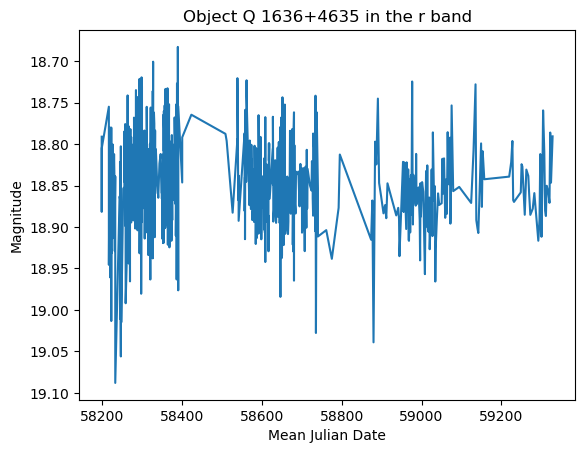

In [7]:
lcplot(f'Object {random_names[i]} in the {random_bands[i]} band', LC_data[i][1], LC_data[i][0])

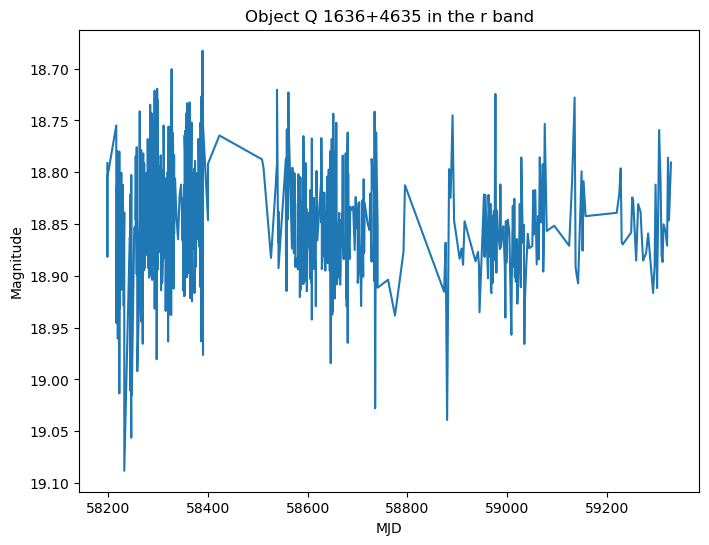

In [8]:
plt.figure(figsize=(8, 6))

plt.plot(LC_data[i][1], LC_data[i][0])

plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.title(f'Object {random_names[i]} in the {random_bands[i]} band')

plt.gca().invert_yaxis()
plt.show()

### Comparinf the $dm/dt$ functions

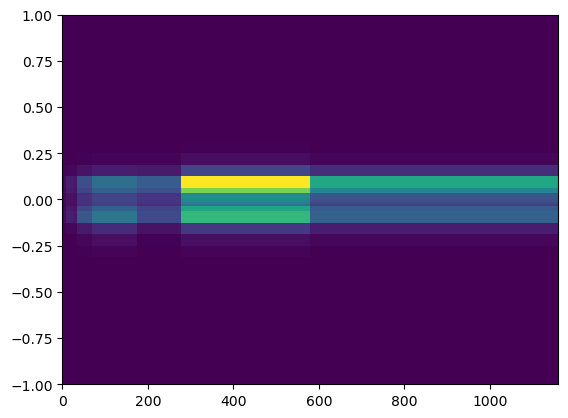

In [10]:
M_hist = dmdtim(LC_data[i][1], LC_data[i][0], len(dmints), len(dmints))

plt.imshow(M_hist, aspect='auto', origin='lower', cmap='viridis')
plt.show()

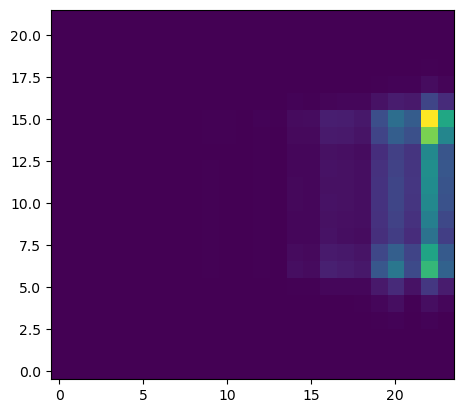

In [11]:
plt.imshow(M_hist, aspect='equal', origin='lower', cmap='viridis')
plt.show()

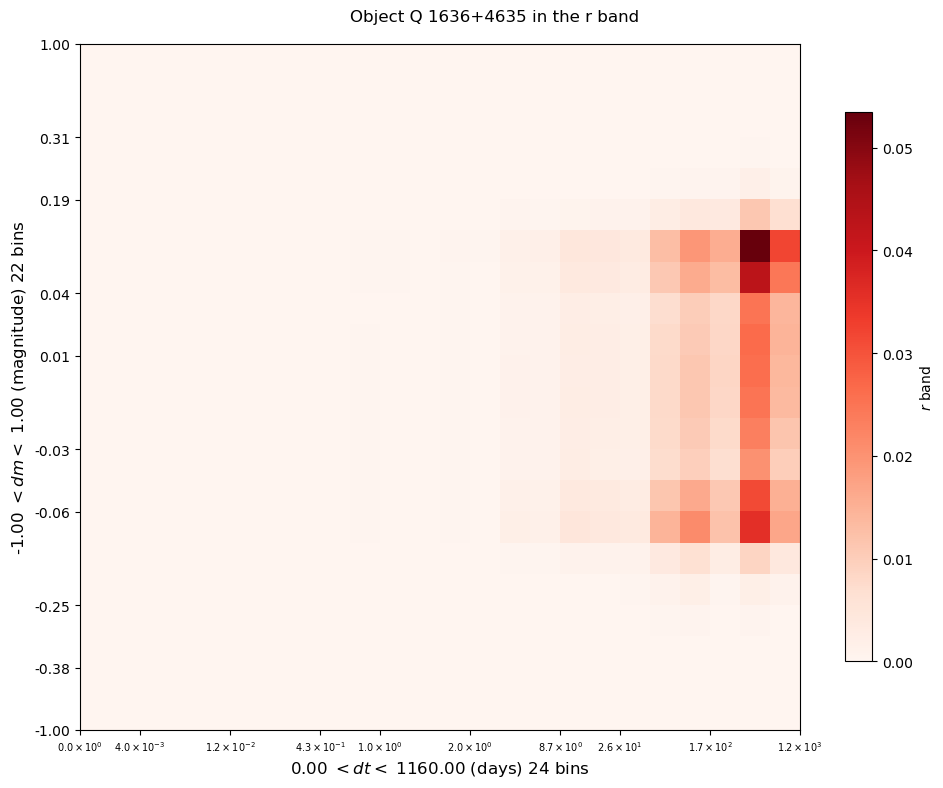

In [12]:
hist, _, _ = get_2Dhistogram(LC_data[i][0], dmints, LC_data[i][1], dtints, normalise=True)

plot_dm_dt(hist, random_bands[i], dmints, dtints, dm_nticks=10, dt_nticks=10,
           title=f'Object {random_names[i]} in the {random_bands[i]} band', return_imshow=False)

In [14]:
(M_hist - 255 * hist).sum()

2.0469737016526324e-16